In [3]:
%run ../scripts/Requirements.ipynb
%run ../scripts/Inventory_Importer.ipynb
%run ../scripts/Figure_Styles.ipynb

repo & folder name: Greenhouse-Data
Requirements imported!
Inventories imported!
current figure and save dpi = 160; current single fig size = (8, 4)
styles imported!


In [6]:
df_supp = pd.read_csv("../supplemental/country_supplemental_metrics.csv", index_col=0)

GCP - Consumption:Production Ratio

In [7]:
df_cons_div_prod = pd.DataFrame()
df_cons_div_prod["prod"] = df_gcp.set_index("code")["2019"]
df_cons_div_prod["cons"] = df_gcp_cons.set_index("code")["2019"]
df_cons_div_prod = df_cons_div_prod.dropna(how="any")
df_cons_div_prod = df_cons_div_prod[df_cons_div_prod.index.notnull()]
df_cons_div_prod["div"] = df_cons_div_prod["cons"] / df_cons_div_prod["prod"]
df_cons_div_prod

df_sup_chosen = df_supp[["iso_code","year","population","gdp"]]
df = df_cons_div_prod.merge(df_sup_chosen[df_sup_chosen.year==2018], left_on="code", right_on="iso_code")

df

,prod,cons,div,iso_code,year,population,gdp
0,4.866990,5.855507,1.203106,ALB,2018,2882735.0,3.400911e+10
1,167.687542,166.720377,0.994232,ARG,2018,44361150.0,8.293733e+11
2,5.532779,5.475768,0.989696,ARM,2018,2951741.0,3.329652e+10
3,414.818519,375.730465,0.905771,AUS,2018,24898153.0,1.238560e+12
4,68.011879,91.687836,1.348115,AUT,2018,8891383.0,3.822694e+11
...,...,...,...,...,...,...,...
114,6.588777,11.611881,1.762373,URY,2018,3449290.0,6.856071e+10
115,99.247503,120.632275,1.215469,VEN,2018,28887117.0,3.094130e+11
116,260.501548,233.446324,0.896142,VNM,2018,95545959.0,6.614884e+11
117,7.052336,10.025021,1.421518,ZMB,2018,17351714.0,6.097862e+10


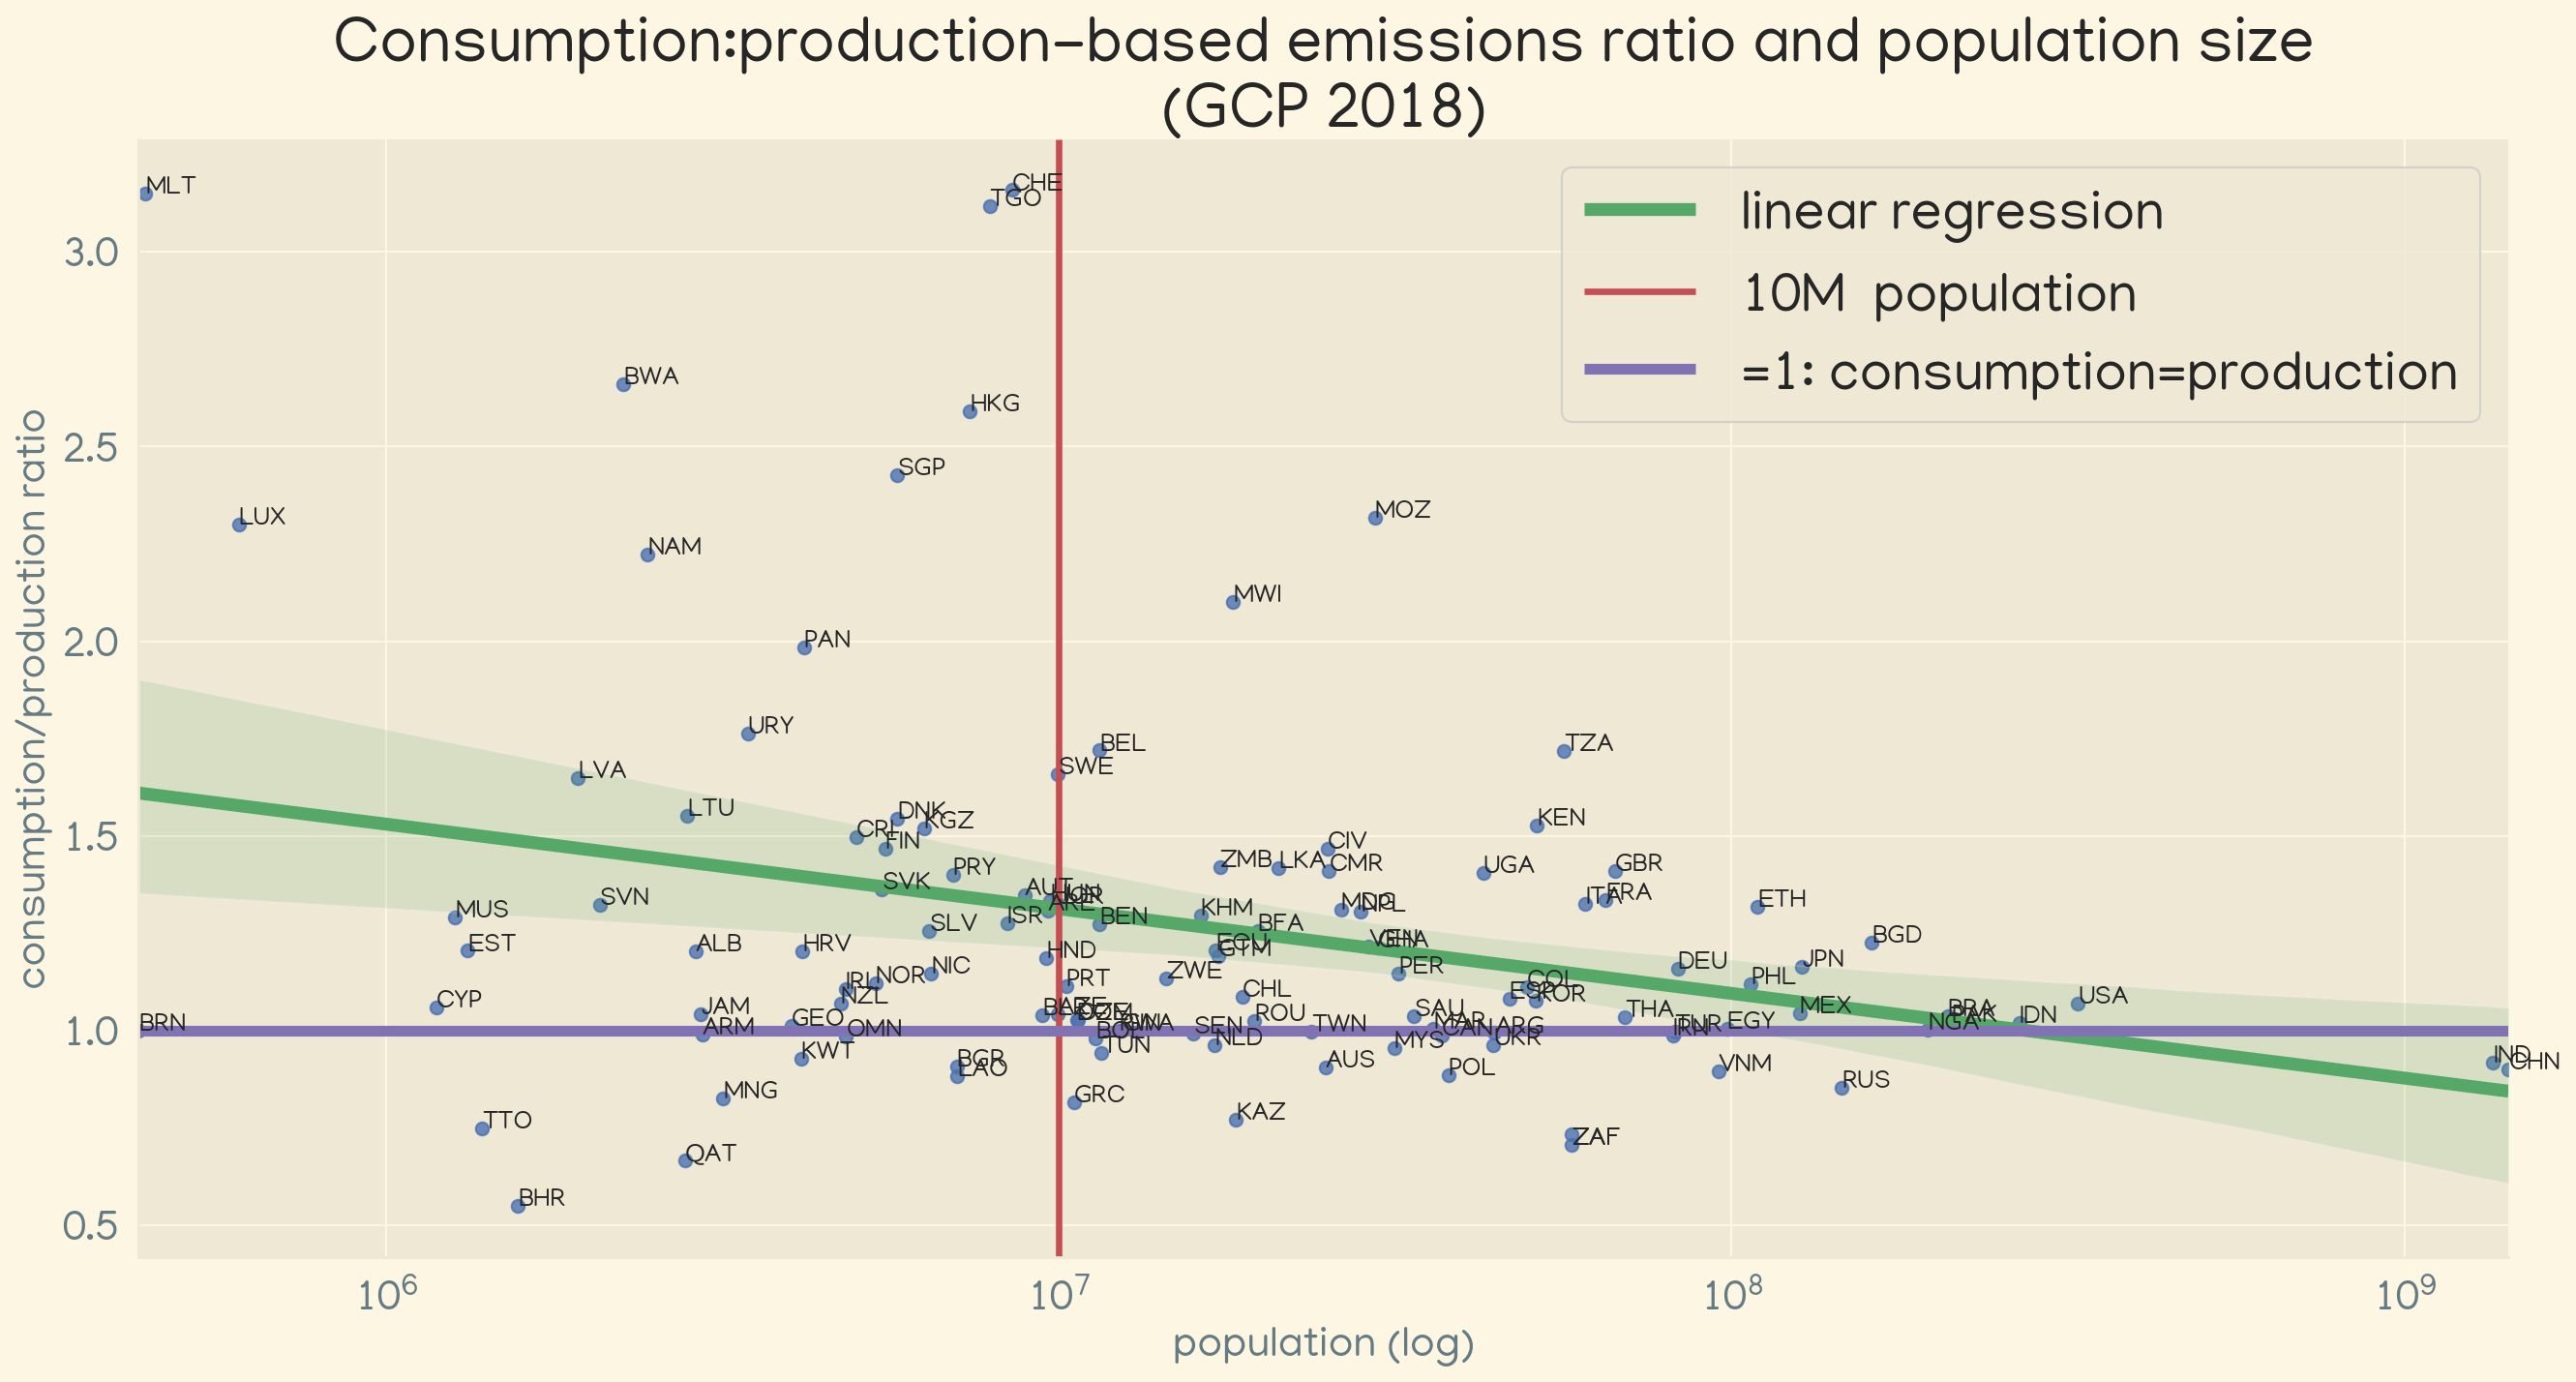

In [4]:
df_cons_div_prod = pd.DataFrame()
df_cons_div_prod["prod"] = df_gcp.set_index("code")["2019"]
df_cons_div_prod["cons"] = df_gcp_cons.set_index("code")["2019"]
df_cons_div_prod = df_cons_div_prod.dropna(how="any")
df_cons_div_prod = df_cons_div_prod[df_cons_div_prod.index.notnull()]
df_cons_div_prod["div"] = df_cons_div_prod["cons"] / df_cons_div_prod["prod"]
df_cons_div_prod

df_sup_chosen = df_sup[["iso_code","year","population","gdp"]]
df = df_cons_div_prod.merge(df_sup_chosen[df_sup_chosen.year==2018], left_on="code", right_on="iso_code")
# display(df)

# df_filter = df[df.population<100000000]
df_filter = df

# -----------------------------------------------------------------------------------------------------------

x = "population"
y="div"
g = sns.lmplot(data=df_filter, 
               x="population", y = "div",
               # hue="gdp", palette="viridis",
               logx=True, legend=False, height=8, aspect=2,
               line_kws={'label':"linear regression", "color":"g","lw":6})
g.set(
      xscale = "log", 
      yscale="linear", 
      ylabel="consumption/production ratio",
      xlabel="population (log)")

axs = g.axes[0,0]
axs.set_title("Consumption:production-based emissions ratio and population size\n(GCP 2018)", fontsize=30)
axs.tick_params(labelsize=20)
axs.xaxis.label.set_size(20)
axs.yaxis.label.set_size(20)
axs.axvline(10000000, label="10M  population", color="r",lw=3)
axs.axhline(1, label="=1: consumption=production", color="m", lw=5)

for i,j in enumerate(df_filter.iso_code):
    # print(j)
    axs.annotate(text = j,
                 xy= (df_filter.loc[df_filter.iso_code==j][x].iloc[0].astype(float),
                      df_filter.loc[df_filter.iso_code==j][y].iloc[0].astype(float)))
    # print(j+"!!")
axs.legend(fontsize=26)

# ----------------------------------------------------------------------------------------------------
g.savefig("global/GCP_cons_prod_ratio.png", bbox_inches="tight")